# Task 1: Preprocess and Explore the Data

## Objective
Load, clean, and understand the financial data for TSLA, BND, and SPY to prepare it for time series forecasting and portfolio optimization.

### Assets:
- **TSLA**: High-growth, high-risk stock (Consumer Discretionary)
- **BND**: Bond ETF providing stability and income (Fixed Income)
- **SPY**: S&P 500 ETF offering broad market exposure (Equity)

### Data Period: July 1, 2015 - July 31, 2025

In [1]:
# Import required libraries
import sys
import os
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from src.data.data_collector import FinancialDataCollector
from src.data.preprocessor import FinancialDataPreprocessor
from src.data.eda import FinancialEDA

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Collection

In [3]:
# Initialize data collector
collector = FinancialDataCollector(
    start_date="2015-07-01",
    end_date="2025-07-31"
)

# Fetch data
print("Fetching historical data...")
raw_data = collector.fetch_data()

# Display summary
summary = collector.get_data_summary()
print("\nData Collection Summary:")
display(summary)

Fetching historical data...

Data Collection Summary:


,Symbol,Records,Start_Date,End_Date,Avg_Close,Min_Close,Max_Close,Avg_Volume,Missing_Values
0,TSLA,2535,2015-07-01 00:00:00-04:00,2025-07-30 00:00:00-04:00,131.963002,9.578000,479.859985,1.141789e+08,0
1,BND,2535,2015-07-01 00:00:00-04:00,2025-07-30 00:00:00-04:00,68.469189,60.779125,77.318253,4.434376e+06,0
2,SPY,2535,2015-07-01 00:00:00-04:00,2025-07-30 00:00:00-04:00,334.193733,155.869766,637.099976,8.503521e+07,0


In [4]:
# Display asset information
asset_info = collector.get_asset_info()
for symbol, info in asset_info.items():
    print(f"\n{symbol} - {info['name']}:")
    print(f"  Sector: {info['sector']}")
    print(f"  Risk Profile: {info['risk_profile']}")
    print(f"  Description: {info['description']}")


TSLA - Tesla Inc.:
  Sector: Consumer Discretionary
  Risk Profile: High Risk, High Return Potential
  Description: High-growth, high-risk stock in the consumer discretionary sector

BND - Vanguard Total Bond Market ETF:
  Sector: Fixed Income
  Risk Profile: Low Risk, Stable Returns
  Description: Bond ETF tracking U.S. investment-grade bonds, providing stability and income

SPY - SPDR S&P 500 ETF Trust:
  Sector: Equity
  Risk Profile: Moderate Risk, Market Returns
  Description: ETF tracking the S&P 500 Index, offering broad U.S. market exposure


## 2. Data Preprocessing and Cleaning

In [5]:
# Initialize preprocessor
preprocessor = FinancialDataPreprocessor()
preprocessor.load_data(data_dict=raw_data)

# Check data quality
quality_report = preprocessor.check_data_quality()

print("Data Quality Report:")
for symbol, report in quality_report.items():
    print(f"\n{symbol}:")
    print(f"  Total records: {report['total_records']:,}")
    print(f"  Missing values: {sum(report['missing_values'].values())}")
    print(f"  Duplicate dates: {report['duplicate_dates']}")
    print(f"  Zero volume days: {report['zero_volume']}")

Data Quality Report:

TSLA:
  Total records: 2,535
  Missing values: 0
  Duplicate dates: 0
  Zero volume days: 0

BND:
  Total records: 2,535
  Missing values: 0
  Duplicate dates: 0
  Zero volume days: 1

SPY:
  Total records: 2,535
  Missing values: 0
  Duplicate dates: 0
  Zero volume days: 0


In [6]:
# Clean and preprocess data
processed_data = preprocessor.clean_data()

# Get basic statistics
stats = preprocessor.get_basic_statistics()
print("Basic Statistics:")
display(stats.round(4))

Basic Statistics:


,Symbol,Count,Mean_Close,Std_Close,Min_Close,Max_Close,Mean_Volume,Mean_Daily_Return,Std_Daily_Return,Skewness,Kurtosis
0,TSLA,2535,131.9630,120.9149,9.5780,479.8600,1.141789e+08,0.0018,0.0373,0.2949,4.3146
1,BND,2535,68.4692,4.5546,60.7791,77.3183,4.434376e+06,0.0001,0.0035,-0.9448,36.3342
2,SPY,2535,334.1937,126.4277,155.8698,637.1000,8.503521e+07,0.0006,0.0115,-0.3094,13.9038


In [7]:
# Test stationarity
stationarity = preprocessor.test_stationarity()

print("Stationarity Test Results (Augmented Dickey-Fuller):")
for symbol, results in stationarity.items():
    print(f"\n{symbol}:")
    prices_stationary = "Stationary" if results['prices']['is_stationary'] else "Non-stationary"
    returns_stationary = "Stationary" if results['returns']['is_stationary'] else "Non-stationary"
    print(f"  Prices: p-value = {results['prices']['p_value']:.6f} ({prices_stationary})")
    print(f"  Returns: p-value = {results['returns']['p_value']:.6f} ({returns_stationary})")

Stationarity Test Results (Augmented Dickey-Fuller):

TSLA:
  Prices: p-value = 0.573196 (Non-stationary)
  Returns: p-value = 0.000000 (Stationary)

BND:
  Prices: p-value = 0.515508 (Non-stationary)
  Returns: p-value = 0.000000 (Stationary)

SPY:
  Prices: p-value = 0.989653 (Non-stationary)
  Returns: p-value = 0.000000 (Stationary)


## 3. Exploratory Data Analysis

In [8]:
# Initialize EDA
eda = FinancialEDA(processed_data)

### 3.1 Price Trends Analysis

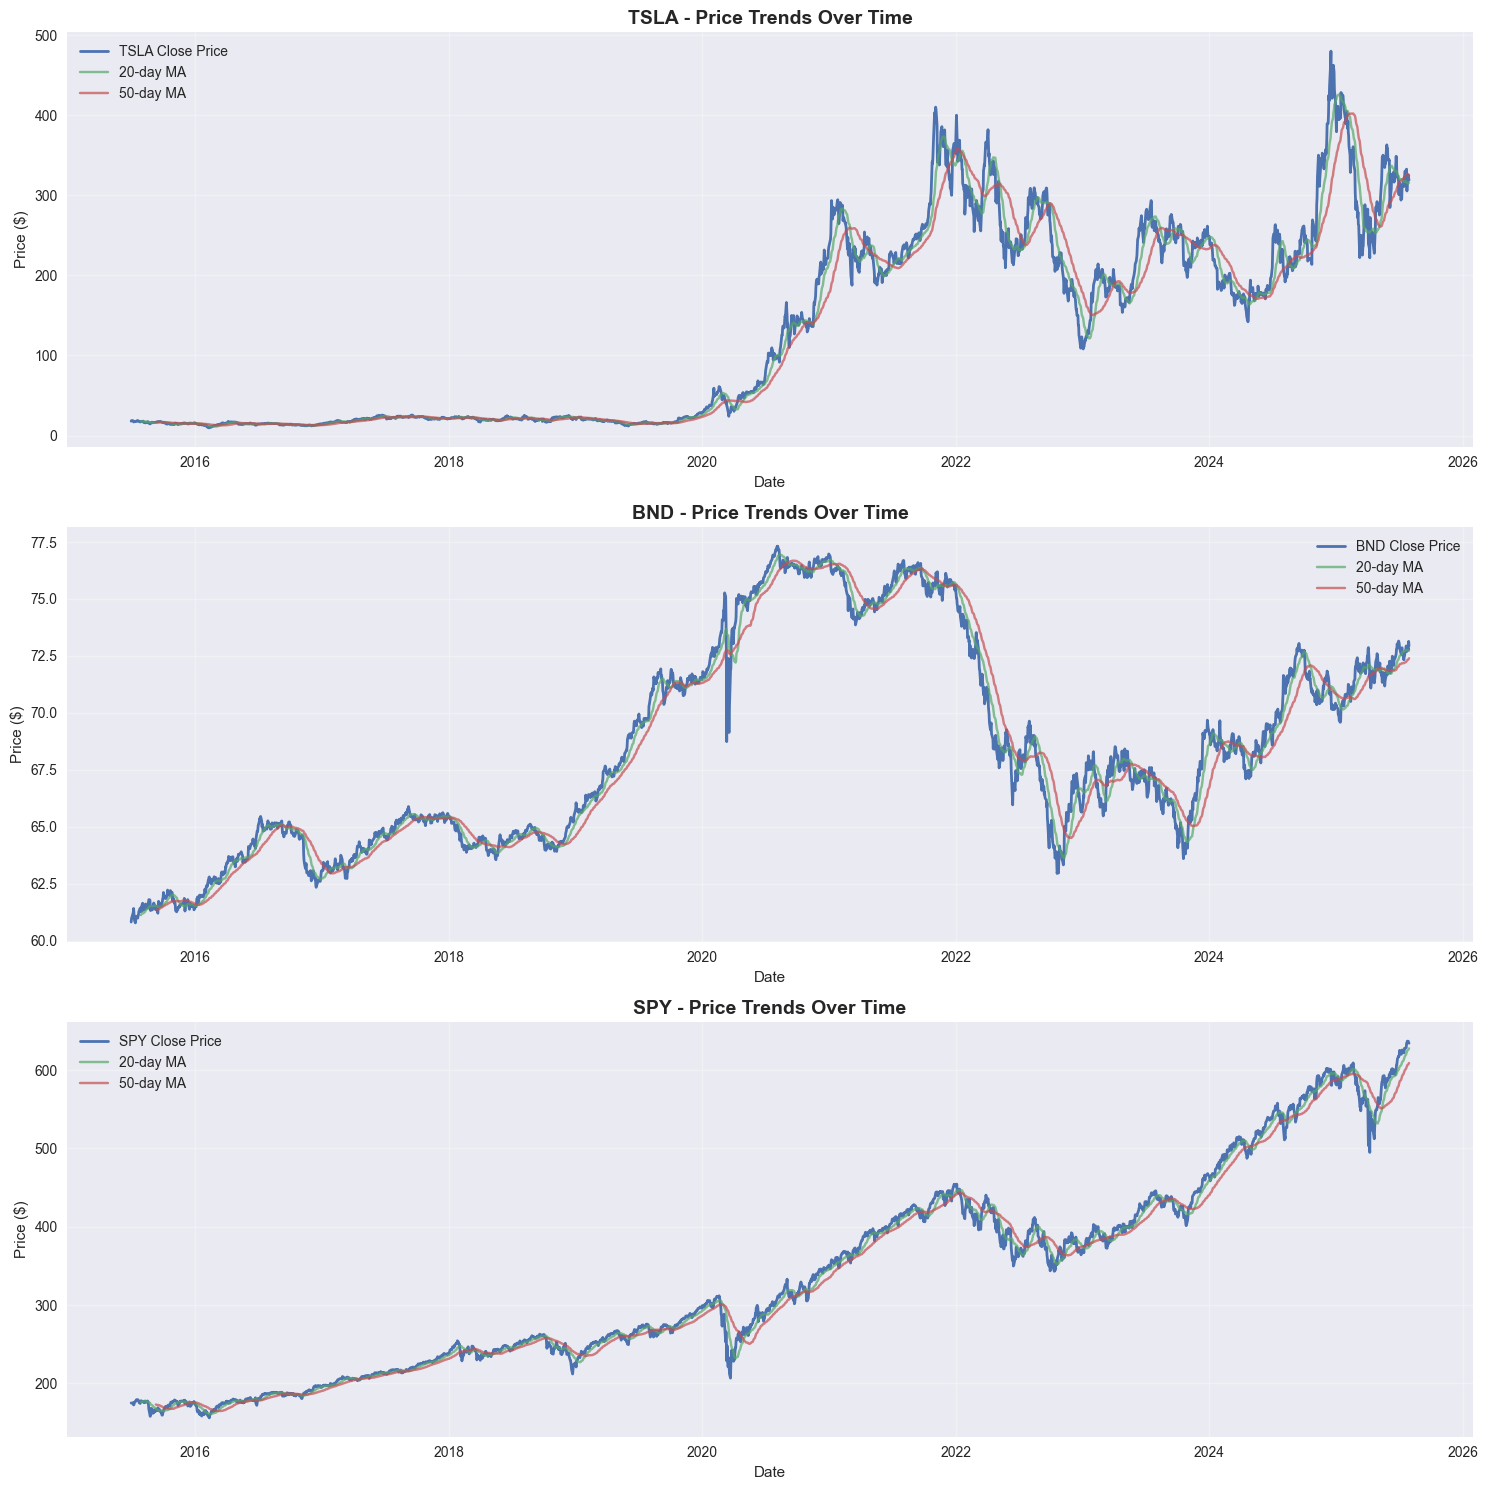

In [9]:
# Plot price trends
eda.plot_price_trends()

### 3.2 Returns Analysis

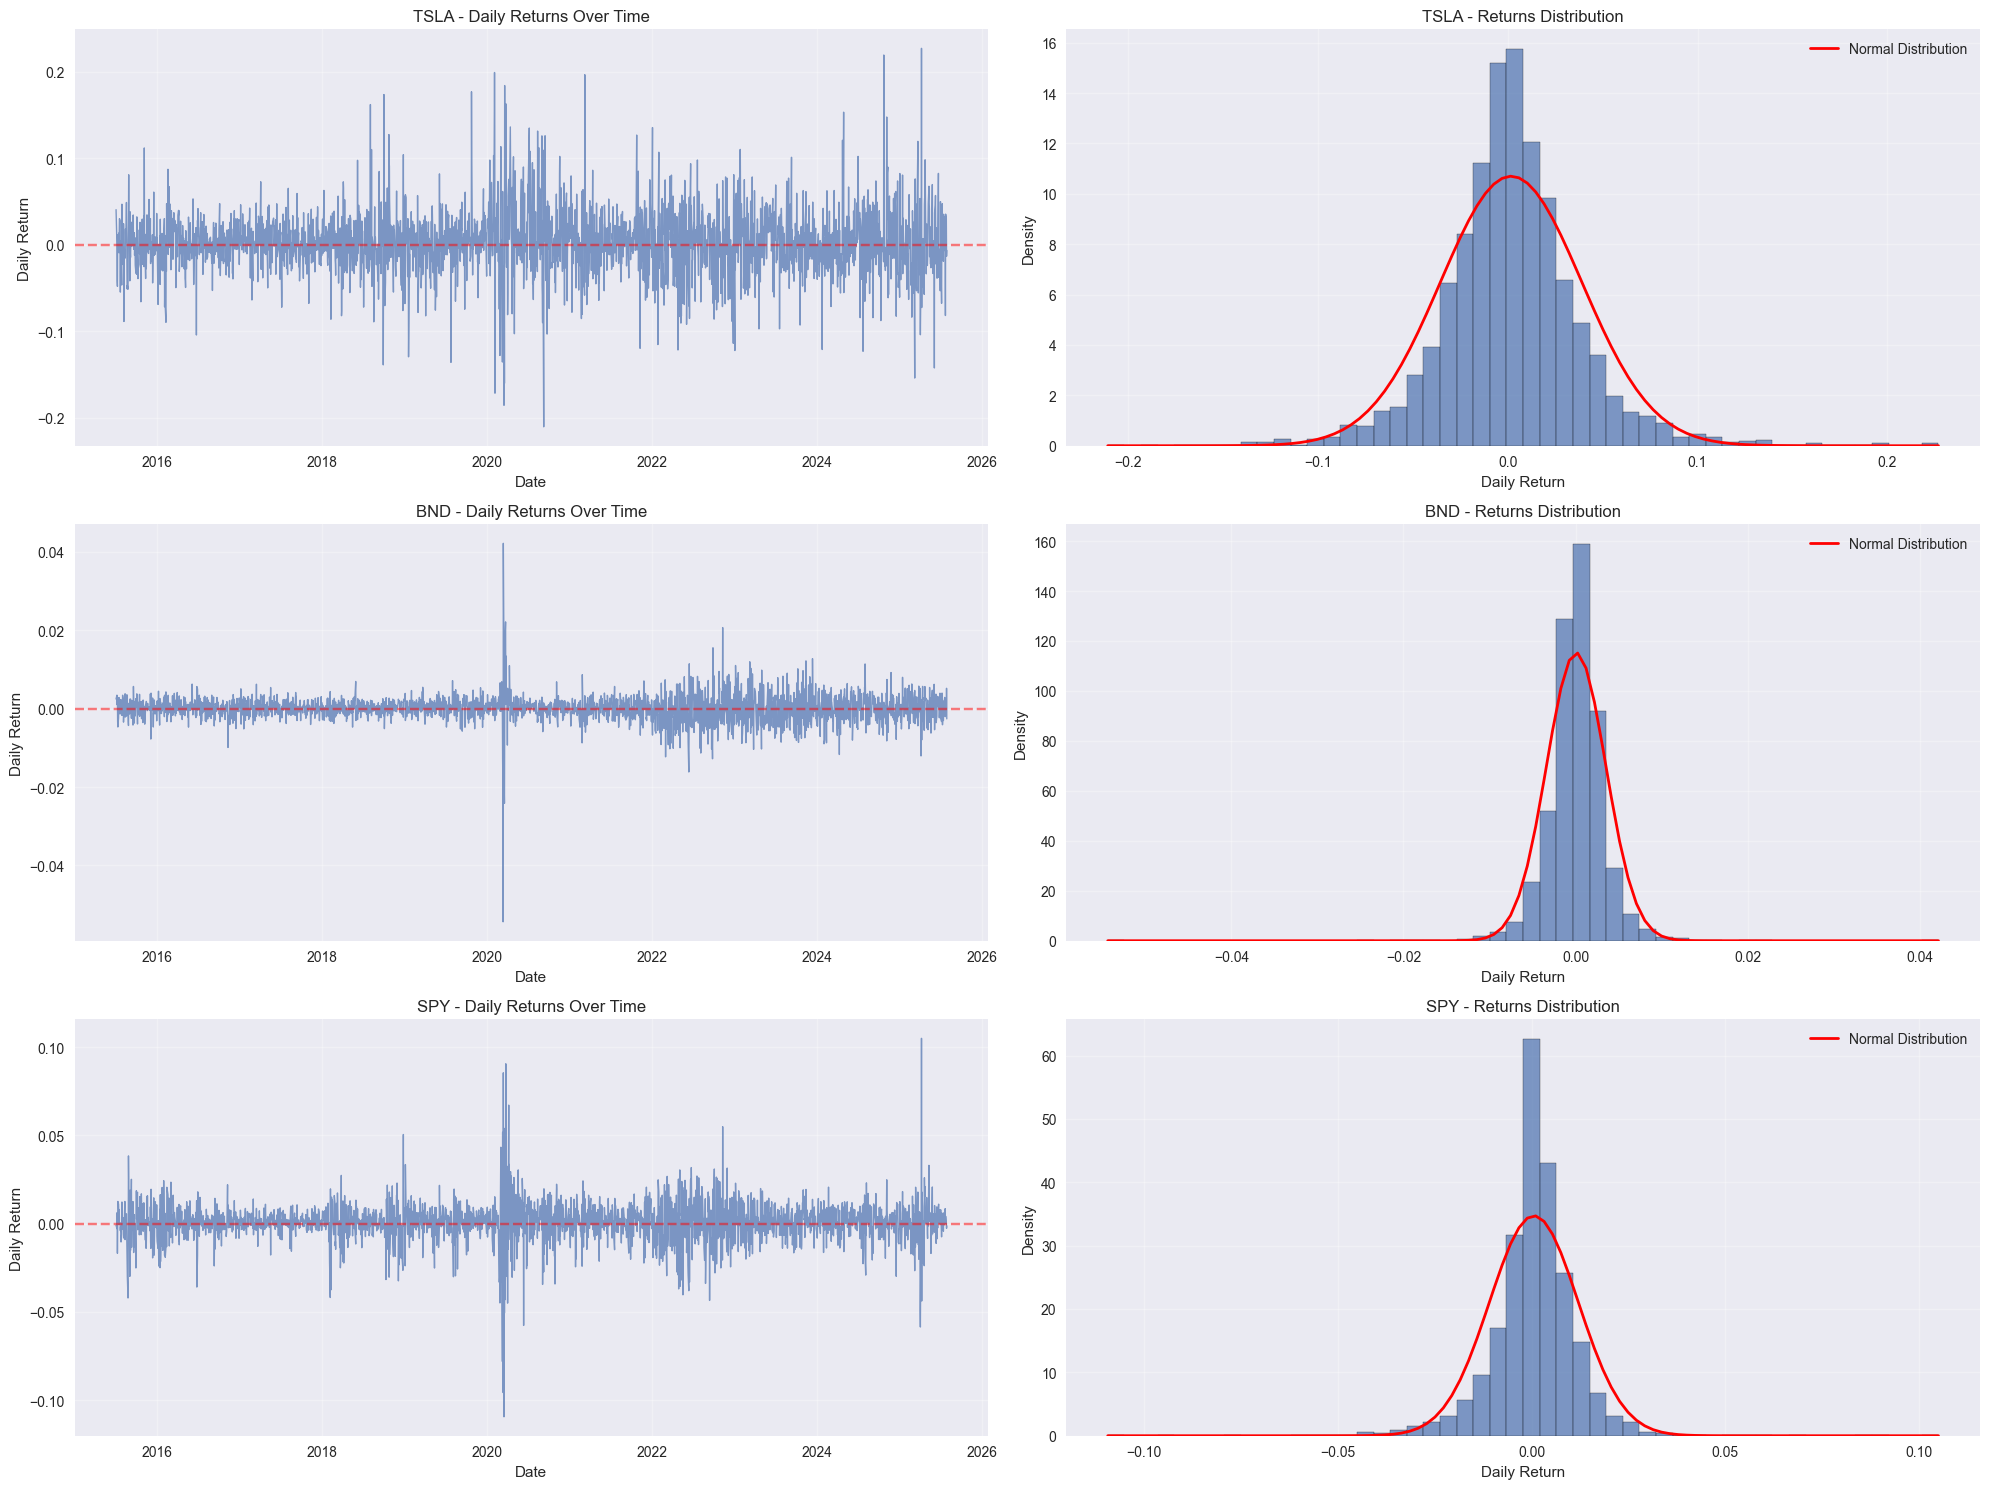

In [10]:
# Plot returns analysis
eda.plot_returns_analysis()

### 3.3 Volatility Analysis

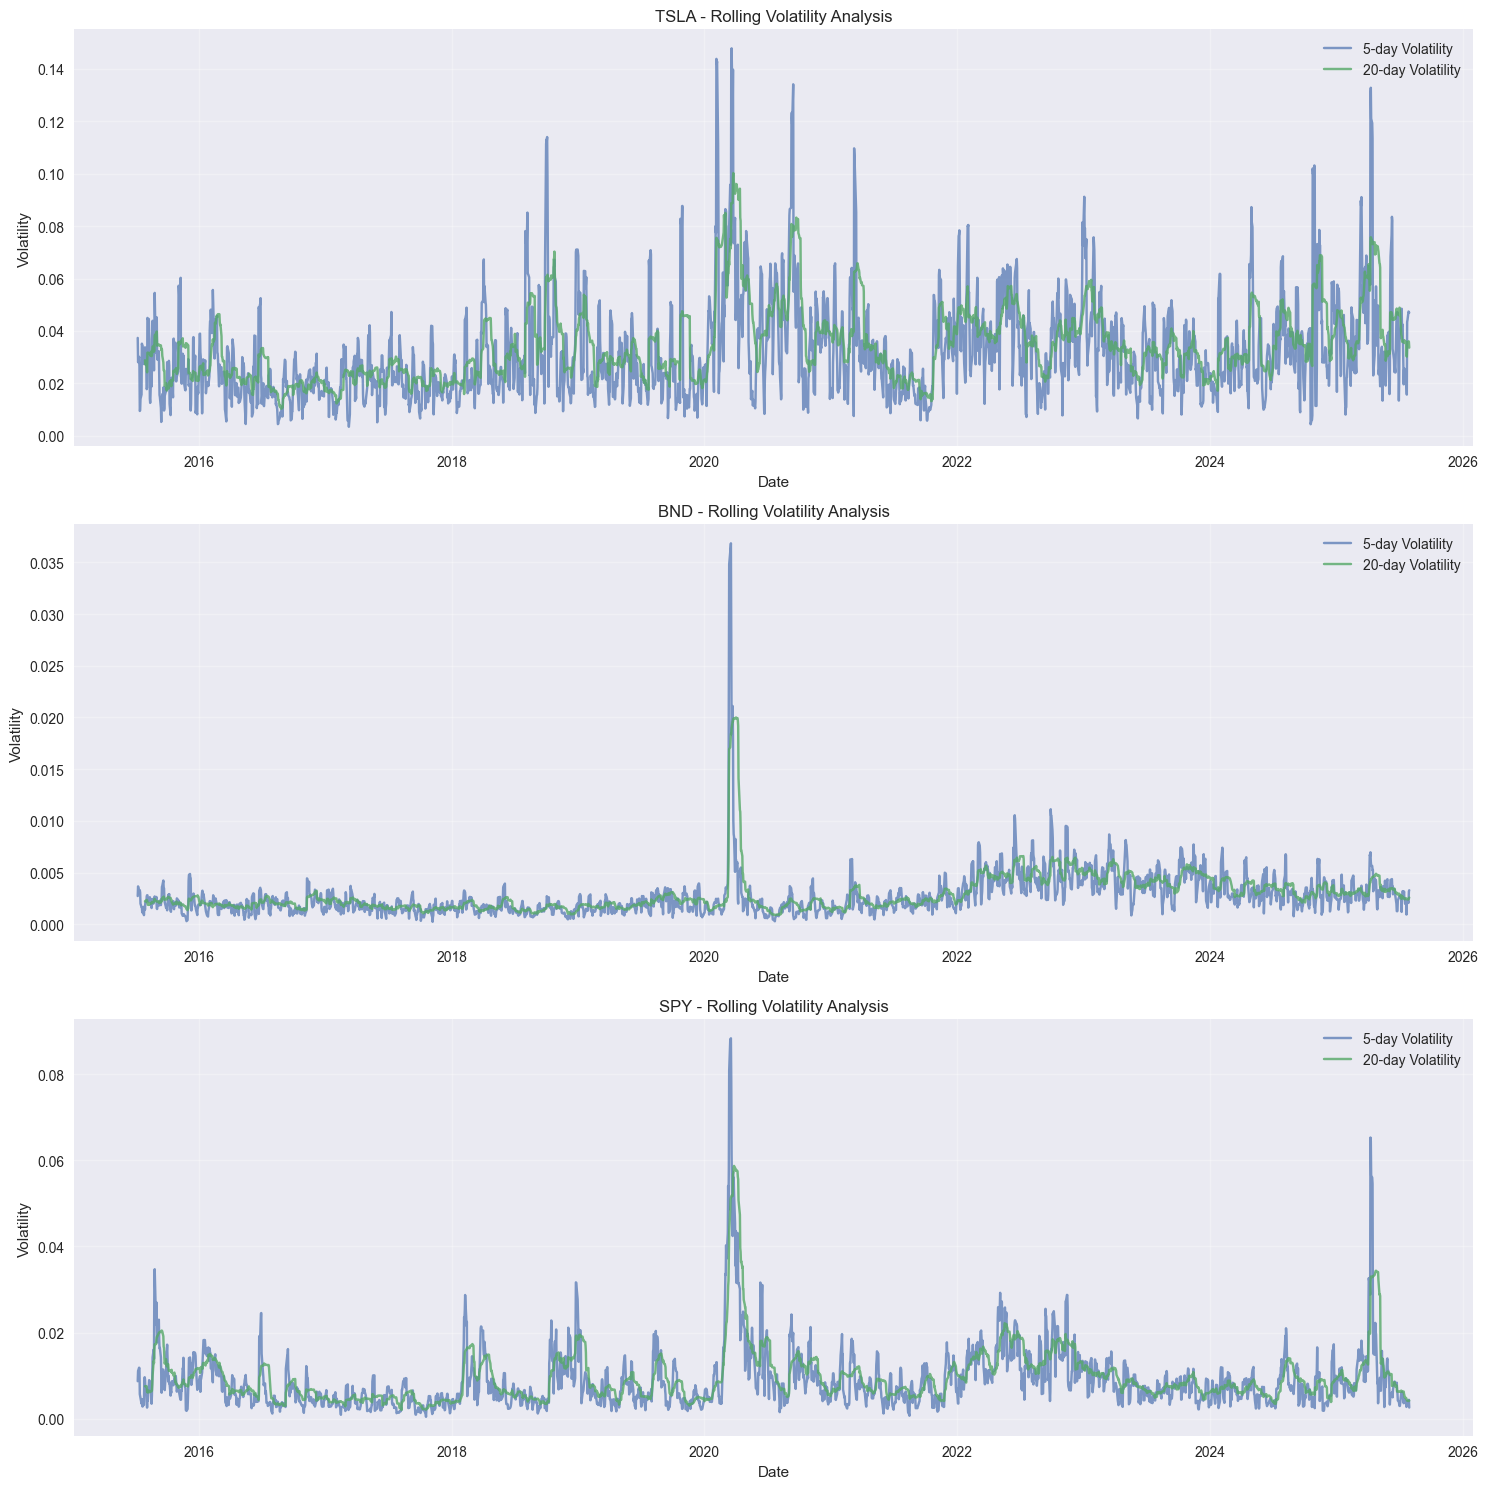

In [11]:
# Plot volatility analysis
eda.plot_volatility_analysis()

### 3.4 Correlation Analysis

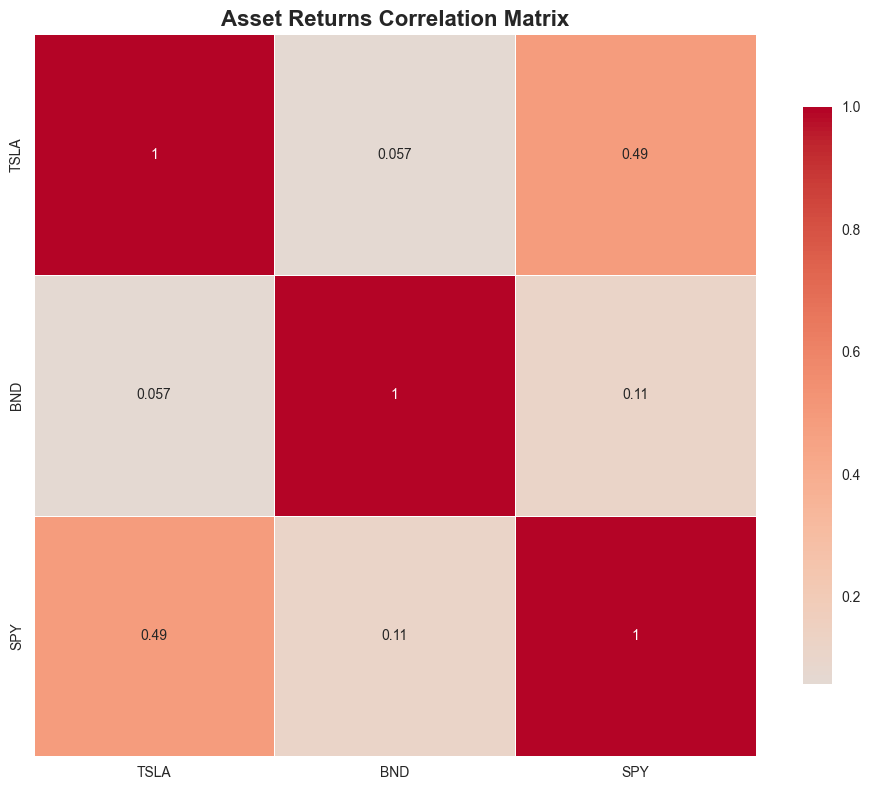


Correlation Matrix:


,TSLA,BND,SPY
TSLA,1.000,0.057,0.490
BND,0.057,1.000,0.115
SPY,0.490,0.115,1.000


In [12]:
# Plot correlation matrix
correlation_matrix = eda.plot_correlation_analysis()
print("\nCorrelation Matrix:")
display(correlation_matrix.round(3))

### 3.5 Risk Metrics

In [13]:
# Calculate risk metrics
risk_metrics = eda.calculate_risk_metrics()
print("Risk Metrics:")
display(risk_metrics.round(4))

Risk Metrics:


,Symbol,Annual_Return,Annual_Volatility,Sharpe_Ratio,VaR_5%,CVaR_5%,Max_Drawdown,Skewness,Kurtosis
0,TSLA,0.4607,0.5919,0.7783,-0.0547,-0.0820,-0.7363,0.2949,4.3146
1,BND,0.0196,0.0549,0.3569,-0.0049,-0.0077,-0.1858,-0.9448,36.3342
2,SPY,0.1448,0.1824,0.7941,-0.0172,-0.0280,-0.3372,-0.3094,13.9038


### 3.6 Outlier Detection

In [14]:
# Detect outliers
outliers = eda.detect_outliers()

print("Outlier Analysis:")
for symbol, outlier_info in outliers.items():
    print(f"\n{symbol}:")
    print(f"  Z-score outliers (|z| > 3): {outlier_info['z_score_outliers']}")
    print(f"  IQR outliers: {outlier_info['iqr_outliers']}")
    print(f"  Top 3 positive returns: {[f'{x:.4f}' for x in outlier_info['extreme_positive'][:3]]}")
    print(f"  Top 3 negative returns: {[f'{x:.4f}' for x in outlier_info['extreme_negative'][:3]]}")

Outlier Analysis:

TSLA:
  Z-score outliers (|z| > 3): 41
  IQR outliers: 135
  Top 3 positive returns: ['0.2269', '0.2192', '0.1989']
  Top 3 negative returns: ['-0.2106', '-0.1858', '-0.1718']

BND:
  Z-score outliers (|z| > 3): 26
  IQR outliers: 113
  Top 3 positive returns: ['0.0422', '0.0221', '0.0207']
  Top 3 negative returns: ['-0.0544', '-0.0241', '-0.0207']

SPY:
  Z-score outliers (|z| > 3): 35
  IQR outliers: 179
  Top 3 positive returns: ['0.1050', '0.0906', '0.0855']
  Top 3 negative returns: ['-0.1094', '-0.0957', '-0.0781']


## 4. Key Insights and Findings

In [ ]:
# Generate comprehensive report
report = eda.generate_comprehensive_report()

print("KEY INSIGHTS:")
for insight in report['key_insights']:
    print(f"• {insight}")

# Additional analysis
print("\nADDITIONAL ANALYSIS:")

# Volatility ranking
vol_data = risk_metrics.set_index('Symbol')['Annual_Volatility']
print(f"• Volatility ranking: {' > '.join(vol_data.sort_values(ascending=False).index.tolist())}")

# Return ranking
ret_data = risk_metrics.set_index('Symbol')['Annual_Return']
print(f"• Return ranking: {' > '.join(ret_data.sort_values(ascending=False).index.tolist())}")

# Best risk-adjusted performance
sharpe_data = risk_metrics.set_index('Symbol')['Sharpe_Ratio']
best_sharpe = sharpe_data.idxmax()
print(f"• Best risk-adjusted performance: {best_sharpe} (Sharpe: {sharpe_data[best_sharpe]:.3f})")

KEY INSIGHTS:
• TSLA has the highest annual return
• TSLA has the highest volatility
• SPY has the best risk-adjusted returns (Sharpe ratio)

ADDITIONAL ANALYSIS:
• Volatility ranking: TSLA > SPY > BND
• Return ranking: TSLA > SPY > BND
• Best risk-adjusted performance: SPY (Sharpe: 0.794)


## 5. Data Export

In [ ]:
# Save processed data and results
collector.save_data("../data/raw")
preprocessor.save_processed_data("../data/processed")
risk_metrics.to_csv("../results/risk_metrics.csv", index=False)

print("Data and results saved successfully!")
print("\nFiles created:")
print("• Raw data: data/raw/")
print("• Processed data: data/processed/")
print("• Risk metrics: results/risk_metrics.csv")

## Summary

**Task 1 Completed Successfully!**

✅ **Data Collection**: Fetched 10+ years of historical data for TSLA, BND, and SPY

✅ **Data Cleaning**: Handled missing values, validated price consistency, and added derived features

✅ **Statistical Analysis**: Performed stationarity tests and calculated comprehensive risk metrics

✅ **Exploratory Analysis**: Generated visualizations for price trends, returns, volatility, and correlations

✅ **Risk Assessment**: Calculated VaR, CVaR, Sharpe ratios, and maximum drawdown

✅ **Outlier Detection**: Identified anomalous trading days and extreme market movements

The data is now ready for time series forecasting models in Task 2!